#### Bochner's theorem

The concept of random Fourier features comes from Bochner's theorem

A continuous kernel $k(x, y)=k(x-y)$ on $\mathbf{R}^d$ is positive definite if and only if $k(\delta)$ is the Fourier transform of a non-negative measure

#### Random Fourier features (RFFs)

More about RFFs can be found here https://random-walks.org/book/papers/rff/rff.html and here https://gregorygundersen.com/blog/2019/12/23/random-fourier-features/

What we need to know for now is that it allows to rewrite RBF kernel function as

$$\begin{align*}
k(x, y) &=\exp\left(-\frac{(x-y)^2}{2\sigma_k^2}\right)\\
&\approx \frac{1}{m}\sum_{i=1}^m\left[\sqrt{2}\cos(\omega_i^Tx+b_i)\right]\left[\sqrt{2}\cos(\omega_i^Ty+b_i)\right] \\
&=\begin{bmatrix}\sqrt{\frac{2}{m}}\cos(\omega_1^Tx+b_1) &\cdots &\sqrt{\frac{2}{m}}\cos(\omega_m^Tx+b_m)\end{bmatrix}\begin{bmatrix}\sqrt{\frac{2}{m}}\cos(\omega_1^Ty+b_1) \\ \vdots \\\sqrt{\frac{2}{m}}\cos(\omega_m^Ty+b_m)\end{bmatrix} \\
&=\phi(x)^T\phi(y)
\end{align*}$$

where

* $\omega_i$ follows `Gaussian distribution` $N(0, \frac{1}{\sigma_k}I)$ (vector or scalar)
* $b_i$ follows `uniform distribution` over $(0, 2\pi)$ (scalar)
* $m$ is a parameter indicating the number of RFFs to construct $\phi(\cdot)$

#### Matrix notation

If we have $n$ data points $x_1, \cdots, x_n\in\mathbf{R}^d$, then their RFFs can be expressed compactly as

$$\begin{align*}
\phi(x)=\begin{bmatrix}\phi(x_1)^T \\ \vdots \\ \phi(x_n)^T\end{bmatrix}
&= \begin{bmatrix}\begin{bmatrix}\sqrt{\frac{2}{m}}\cos(\omega_{1}^Tx_1+b_1) &\cdots &\sqrt{\frac{2}{m}}\cos(\omega_{m}^Tx_1+b_m)\end{bmatrix} \\ \vdots \\ \begin{bmatrix}\sqrt{\frac{2}{m}}\cos(\omega_{1}^Tx_n+b_1) &\cdots &\sqrt{\frac{2}{m}}\cos(\omega_{m}^Tx_n+b_m)\end{bmatrix}\end{bmatrix} \\
&=\sqrt{\frac{2}{m}}\cos \left(\begin{bmatrix}\begin{bmatrix}(\omega_{1}^Tx_1+b_1) &\cdots &(\omega_{m}^Tx_1+b_m)\end{bmatrix} \\ \vdots \\ \begin{bmatrix}(\omega_{1}^Tx_n+b_1) &\cdots &(\omega_{m}^Tx_n+b_m)\end{bmatrix}\end{bmatrix}\right)\\
&=\sqrt{\frac{2}{m}}\cos  \left(\begin{bmatrix}x_1^T \\ \vdots \\x_n^T\end{bmatrix}_{n \times d}\begin{bmatrix}\omega_1 & \cdots &\omega_m\end{bmatrix}_{d \times m}+\begin{bmatrix}b_1 & \cdots &b_m \end{bmatrix}_{1 \times m}\right)
\end{align*}$$

where the final line uses `broadcasting`

#### We can compare true RBF kernel function and approximation using RFFs

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
np.set_printoptions(formatter={'float': '{: 0.4f}'.format})
plt.style.use('dark_background')

In [ ]:
def rbf_rff_comparison(d=1, m=150, n=100, sigma=1.):
    x = np.linspace(0, 6, n) # n: number of data
    omega = np.random.normal(0, 1/sigma, (d, m)) # d: data dim, m: number of RFFs
    b = np.random.uniform(0, 2*np.pi, (1, m))

    # RFFs
    phi = np.sqrt(2/m) * np.cos(x.reshape(-1, 1) @ omega + b)
    print(phi.shape)

    # Anchor point
    x_1 = x[n // 2]

    # Compute RBF function centered at x_1
    rbf_function = np.exp(-0.5 * (x - x_1)**2 / sigma**2)
    print(rbf_function.shape)

    # Compute approximation based on RFFs
    rff_approximation = phi @ phi[n // 2].T
    print(rff_approximation.shape)

    # Plot both
    plt.figure(figsize=(8,4))
    plt.plot(x, rbf_function, 'm', linewidth=2, label='RBF function')
    plt.plot(x, rff_approximation, 'c', linewidth=2, label='RFF approximation')
    plt.legend()
    plt.show()

(100, 300)
(100,)
(100,)


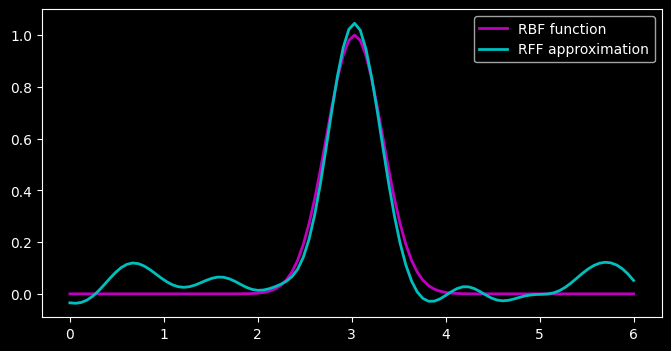

In [ ]:
rbf_rff_comparison(d=1, m=300, n=100, sigma=0.3)